In [1]:
from keras.src.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.src.models import Sequential
import matplotlib.pyplot as plt
from keras.src.optimizers import Adam

2025-07-11 10:26:59.926932: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-11 10:26:59.948144: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Build Model

In [2]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(12, 28, 1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(31, activation='softmax'))

/home/minhpn/anaconda3/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 12, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,376,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,390,527 (5.30 MB)

 Trainable params: 1,390,527 (5.30 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,

)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/home/minhpn/Desktop/Green_Parking/dataset_vietnam_licenses_plate_train_thresh'
test_dir = '/home/minhpn/Desktop/Green_Parking/dataset_vietnam_license_plate_val_thresh'

# Load images from folders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(12, 28),
    batch_size=8,
    class_mode='categorical',
    color_mode='rgb'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(12, 28),
    batch_size=8,
    class_mode='categorical',
    color_mode='rgb'
)

Found 3100 images belonging to 31 classes.
Found 620 images belonging to 31 classes.


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=7,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
)

Epoch 1/7


/home/minhpn/anaconda3/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0562 - loss: 3.4030 - val_accuracy: 0.1081 - val_loss: 3.3178
Epoch 2/7
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1746 - loss: 3.3137
Epoch 3/7
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2435 - loss: 3.1369

2025-07-11 10:27:03.371291: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/minhpn/anaconda3/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2453 - loss: 3.1293 - val_accuracy: 0.3177 - val_loss: 2.8883
Epoch 4/7
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2787 - loss: 2.8655
Epoch 5/7
12/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3800 - loss: 2.4233

2025-07-11 10:27:03.828218: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3946 - loss: 2.4001 - val_accuracy: 0.4839 - val_loss: 2.1079
Epoch 6/7
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4491 - loss: 2.0421
Epoch 7/7
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4799 - loss: 1.8076 - val_accuracy: 0.7210 - val_loss: 1.2779


78/78 - 0s - 3ms/step - accuracy: 0.7210 - loss: 1.2779


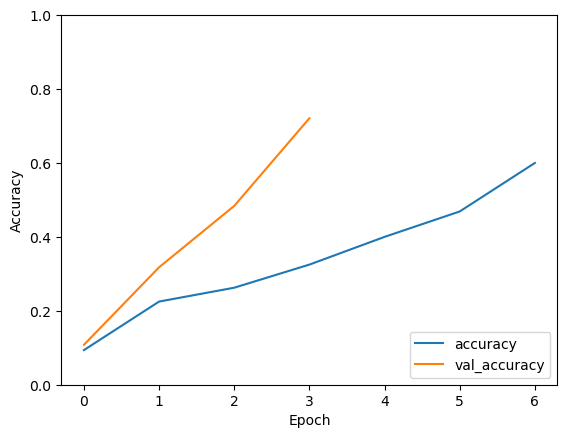

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

In [8]:
print(test_acc)

0.7209677696228027


In [9]:
model.save("CNN_Model.keras")